In [1]:
import numpy as np
import IPython
import scipy.io.wavfile
import scipy.signal as sig
import matplotlib.pyplot as plt

In [2]:
# A room with a single wall
def single_wall(x, d1, d2, g, fs):
    N = np.sqrt((0.5*d1)**2+d2**2)*2/330*fs
    filt = np.zeros(int(N))
    filt[0] = 1
    filt[-1] = g
    plt.figure()
    plt.plot(filt)
    plt.title("plot of filter")
    return sig.convolve(x, filt)
    
# A room with two walls
def double_wall(x, d1, d2, g, fs):
    N1 = np.sqrt((0.5*d1)**2+d2**2)*2/330*fs
    N2 = np.sqrt((0.5*d1)**2+(2*d2)**2)*2/330*fs
    filt = np.zeros(int(N2))
    filt[0] = 1
    filt[int(N1)] = g
    filt[-1] = g
    plt.figure()
    plt.plot(filt)
    plt.title("plot of filter")
    return sig.convolve(x, filt)

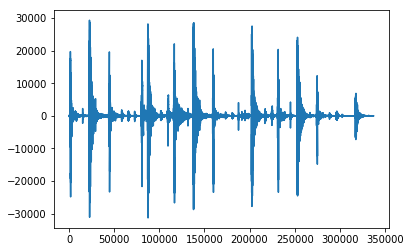

In [3]:
frate, file = scipy.io.wavfile.read("./data/loop.wav")
IPython.display.display( IPython.display.Audio( file, rate=frate))
plt.plot(file)

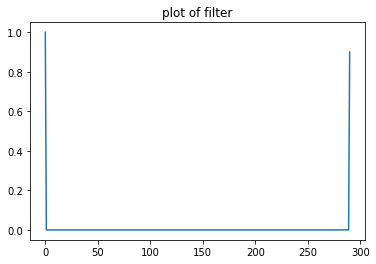

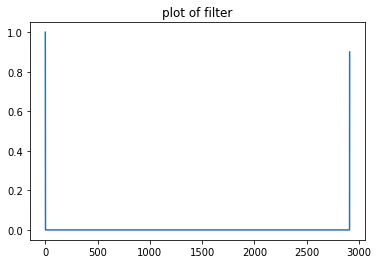

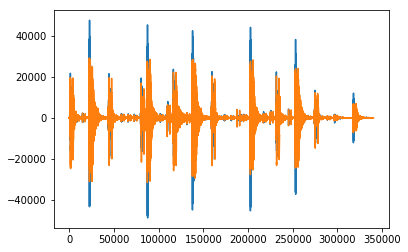

In [40]:
# Part 1 a
single_echo_small = single_wall(file, 0.1, 1, 0.9, frate)
single_echo = single_wall(file, 1, 10, 0.9, frate)
IPython.display.display( IPython.display.Audio( single_echo_small, rate=frate))
IPython.display.display( IPython.display.Audio( single_echo, rate=frate))
plt.figure()
plt.plot(single_echo_small)
plt.plot(single_echo)
# when we use [1, 10] the echo is more obvious

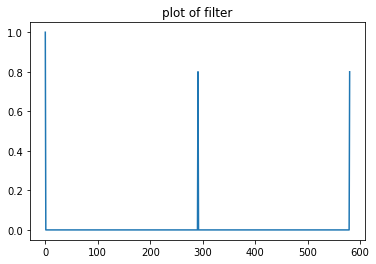

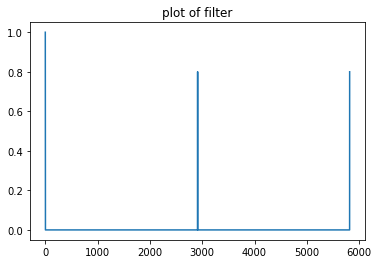

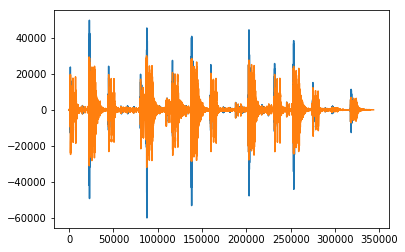

In [42]:
# Part 1 b double wall room
double_echo_small = double_wall(file, 0.1, 1, 0.8, frate)
double_echo = double_wall(file, 1, 10, 0.8, frate)
IPython.display.display( IPython.display.Audio( double_echo_small, rate=frate))
IPython.display.display( IPython.display.Audio( double_echo, rate=frate))
plt.figure()
plt.plot(double_echo_small)
plt.plot(double_echo)

In [6]:
def allpass(input_sound, delay, fs, g):
    N = int(delay*fs)
    a = np.zeros(N + 1)
    b = np.zeros(N + 1)
    a[0] = 1
    b[0] = g
    a[N] = g
    b[N] = 1
    return sig.lfilter(b, a, input_sound)

def comb_filter(input_sound, delay, fs, g):
    N = int(delay*fs)
    a = np.zeros(N + 1)
    b = np.zeros(N + 1)
    a[0] = 1
    b[0] = 1
    a[N] = g
    return sig.lfilter(b, a, input_sound)

In [43]:
# Part 1 c
allpass_res = allpass(file, 0.1, frate, 0.5)
IPython.display.display( IPython.display.Audio( allpass_res, rate=frate))

In [35]:
# part 2
def schroeder(input_sound, fs):
    c1 = comb_filter(input_sound, 0.02, fs, 0.5)
    c2 = comb_filter(input_sound, 0.015, fs, 0.5)
    c3 = comb_filter(input_sound, 0.015, fs, 0.5)
    c4 = comb_filter(input_sound, 0.02, fs, 0.5)
    comb_sum = c1 + c2 + c3 + c4
    a1 = allpass(comb_sum, 0.04, fs, 0.5)
    a2 = allpass(a1, 0.03, fs, 0.5)
    return input_sound+a2

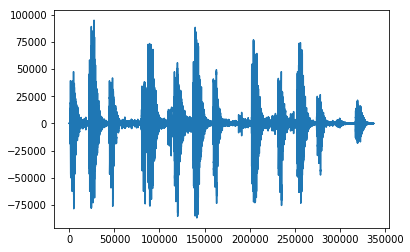

In [36]:
schroeder_res = schroeder(file, frate)
IPython.display.display( IPython.display.Audio( schroeder_res, rate=frate))
plt.plot(schroeder_res)

# I adjusted the parameters so that there are not too much echos.

In [37]:
# part 3
frate2 , file2 = scipy.io.wavfile.read("./stereo.wav")
l = sig.fftconvolve( file2[:,0], file)
r = sig.fftconvolve( file2[:,1], file)
res = np.array([l, r])
IPython.display.display( IPython.display.Audio( res, rate=frate))
# This sounds like in a church